In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

https://docs.google.com/spreadsheets/d/1IFOUnrGGsXONB_T6HJUdwFJ0UjM6aTpRf1K8Oyd4AtY/edit?usp=sharing

In [24]:
filename="./tab.txt"

df = pd.read_csv(filename, delimiter='\t')
data = df.values 
df.head(10)

,przemek,Norbert,Andrzej,Hus,Tomek,Agata,Agnieszka,Patryk
0,0,-0.033934,1.00,1.00,1.00,1.00,1.00,1.00
1,0,0.646155,0.51,0.91,0.85,0.69,0.85,0.64
2,0,0.471744,0.50,0.50,0.35,0.42,0.47,0.00
3,0,0.296306,0.60,1.00,1.00,0.75,0.88,0.51
4,0,0.740208,0.76,0.82,0.80,0.81,0.80,0.74
5,0,0.020269,1.00,1.00,1.00,1.00,1.00,0.85
6,0,1.000000,1.00,1.00,1.00,1.00,1.00,0.00
7,0,0.220641,0.97,0.96,0.49,0.92,0.92,0.00
8,0,0.579609,0.69,0.87,0.85,0.60,0.61,0.00
9,0,0.938235,0.97,0.98,1.00,0.97,0.99,0.00


In [25]:
data = np.array(data, dtype=np.float32)
data

array([[ 0.        , -0.03393425,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ],
       [ 0.        ,  0.646155  ,  0.51      ,  0.91      ,  0.85      ,
         0.69      ,  0.85      ,  0.64      ],
       [ 0.        ,  0.47174406,  0.5       ,  0.5       ,  0.35      ,
         0.42      ,  0.47      ,  0.        ],
       [ 0.        ,  0.296306  ,  0.6       ,  1.        ,  1.        ,
         0.75      ,  0.88      ,  0.51      ],
       [ 0.        ,  0.7402083 ,  0.76      ,  0.82      ,  0.8       ,
         0.81      ,  0.8       ,  0.74      ],
       [ 0.        ,  0.0202691 ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.85      ],
       [ 0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  0.        ],
       [ 0.        ,  0.22064112,  0.97      ,  0.96      ,  0.49      ,
         0.92      ,  0.92      ,  0.        ],
       [ 0.        ,  0.57960945

In [26]:
data = -data
y = np.argsort(data, axis=1)

n_samples, n_features = data.shape
res = np.zeros_like(data)

for i in range(n_samples):
    n = 1
    for j in range(n_features):
        if j == 0:
            res[i, y[i, j]] = n
        elif data[i, y[i, j - 1]] == data[i, y[i, j]]:
            res[i, y[i, j]] = n
        else:
            n += 1
            res[i, y[i, j]] = n
            

for i in range(n_samples):
    n = 1
    for j in range(n_features):
        if j == 0:
            res[i, y[i, j]] = n
        elif data[i, y[i, j - 1]] == data[i, y[i, j]]:
            res[i, y[i, j]] = n
        else:
            n += 1
            res[i, y[i, j]] = n

res1 = np.copy(res)
res1 = res1.astype(float)

for i in range(n_samples):
    n = 0
    for j in range(1,12):
        v = np.where(res[i, :] == j)[0]
        if v.size == 0:
            break
        n += 1
        res1[i, v] = n + (v.size - 1) / 2.
        n = n + v.size -1

print(res1)


[[7.  8.  3.5 3.5 3.5 3.5 3.5 3.5]
 [8.  5.  7.  1.  2.5 4.  2.5 6. ]
 [7.5 3.  1.5 1.5 6.  5.  4.  7.5]
 [8.  7.  5.  1.5 1.5 4.  3.  6. ]
 [8.  6.  5.  1.  3.5 2.  3.5 7. ]
 [8.  7.  3.  3.  3.  3.  3.  6. ]
 [7.5 3.5 3.5 3.5 3.5 3.5 3.5 7.5]
 [7.5 6.  1.  2.  5.  3.5 3.5 7.5]
 [7.5 6.  3.  1.  2.  5.  4.  7.5]
 [7.5 6.  4.5 3.  1.  4.5 2.  7.5]
 [7.5 6.  2.5 1.  2.5 4.5 4.5 7.5]
 [7.5 3.5 3.5 3.5 3.5 3.5 3.5 7.5]
 [7.  7.  4.  5.  1.  2.  3.  7. ]
 [6.5 6.5 1.  6.5 4.  2.  3.  6.5]
 [7.  7.  3.  5.  1.  4.  2.  7. ]
 [7.  7.  2.  1.  4.  3.  5.  7. ]
 [6.5 6.5 2.  6.5 1.  3.  4.  6.5]
 [5.5 5.5 5.5 5.5 2.  1.  5.5 5.5]]


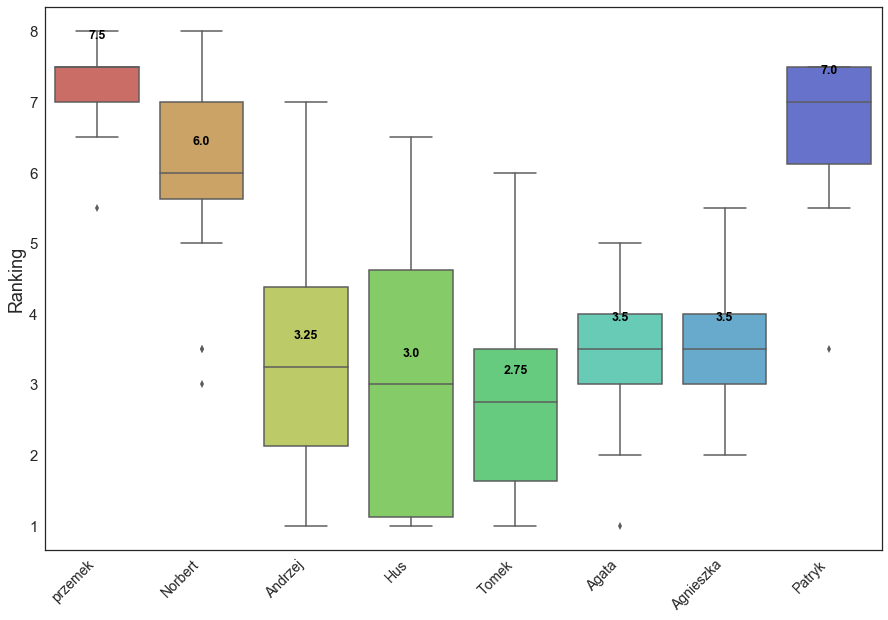

In [27]:
data = res1
name_list = df.columns.values

plt.figure(figsize=(15,10))
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

bplot = sns.boxplot(data = data, palette=sns.color_palette("hls", 11))

bplot.set_ylabel(r'Ranking', fontsize=18)

bplot.set_xticklabels(name_list, rotation=45, ha='right', fontsize=14)

medians = np.median(data, axis=0)
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos, bplot.get_xticklabels()):
    bplot.text(pos[tick], medians[tick] + 0.4, median_labels[tick],
            horizontalalignment='center', size='x-small', color='k', weight='semibold')

plt.show();